In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/5G Resource Allocation(in) (1).csv')

In [2]:
# **1. Data Pre-Processing :**
df.info()

df.isna().sum()

df.duplicated().sum()

df['Application_Type'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

In [3]:
from sklearn.preprocessing import OrdinalEncoder

data = [['IoT_Temperature', 'Web_Browsing', 'VoIP_Call', 'Voice_Call', 'Video_Call', 'File_Download',
    'Background_Download', 'Streaming', 'Video_Streaming', 'Online_Gaming', 'Emergency_Service']]

encoder = OrdinalEncoder(categories=data)

print(df['Application_Type'].unique())
df['Application_Type'] = encoder.fit_transform(np.array(df['Application_Type']).reshape(-1,1))
print(df['Application_Type'].unique())

df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%','').astype('int')

df['User_ID'] = df['User_ID'].str.replace('User_','').astype('int')


['Video_Call' 'Voice_Call' 'Streaming' 'Emergency_Service' 'Online_Gaming'
 'Background_Download' 'Web_Browsing' 'IoT_Temperature' 'Video_Streaming'
 'File_Download' 'VoIP_Call']
[ 4.  3.  7. 10.  9.  6.  1.  0.  8.  5.  2.]


In [4]:
def mbps_to_kbps(value):
    if 'Mbps' in value:
        n = float(value.replace(' Mbps',''))
        return str(n*1000)+' Kbps'
    else:
        return value

df['Required_Bandwidth'] = df['Required_Bandwidth'].map(mbps_to_kbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].map(mbps_to_kbps)


df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace(' Kbps','').astype('float')
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace(' Kbps','').astype('float')

df['Latency'] = df['Latency'].str.replace(' ms','').astype('int')

df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm','').astype('int')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df.info()
df.head()
df.tail()
df.describe()

df.drop('User_ID', axis=1, inplace=True)

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   User_ID              400 non-null    int64         
 2   Application_Type     400 non-null    float64       
 3   Signal_Strength      400 non-null    int64         
 4   Latency              400 non-null    int64         
 5   Required_Bandwidth   400 non-null    float64       
 6   Allocated_Bandwidth  400 non-null    float64       
 7   Resource_Allocation  400 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 25.1 KB


,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,4.0,-75,30,10000.0,15000.0,70
1,2023-09-03 10:00:00,3.0,-80,20,100.0,120.0,80
2,2023-09-03 10:00:00,7.0,-85,40,5000.0,6000.0,75
3,2023-09-03 10:00:00,10.0,-70,10,1000.0,1500.0,90
4,2023-09-03 10:00:00,9.0,-78,25,2000.0,3000.0,85
...,...,...,...,...,...,...,...
395,2023-09-03 10:06:00,7.0,-110,61,1300.0,1800.0,85
396,2023-09-03 10:06:00,4.0,-40,53,14500.0,15800.0,75
397,2023-09-03 10:06:00,8.0,-113,58,1000.0,1400.0,70
398,2023-09-03 10:06:00,10.0,-40,5,400.0,400.0,70


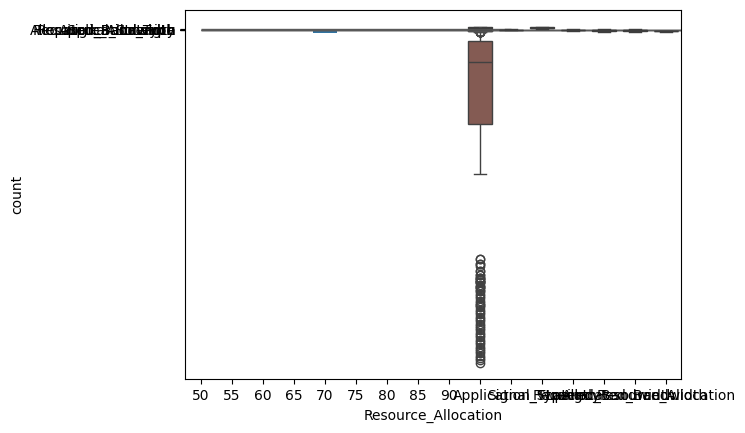

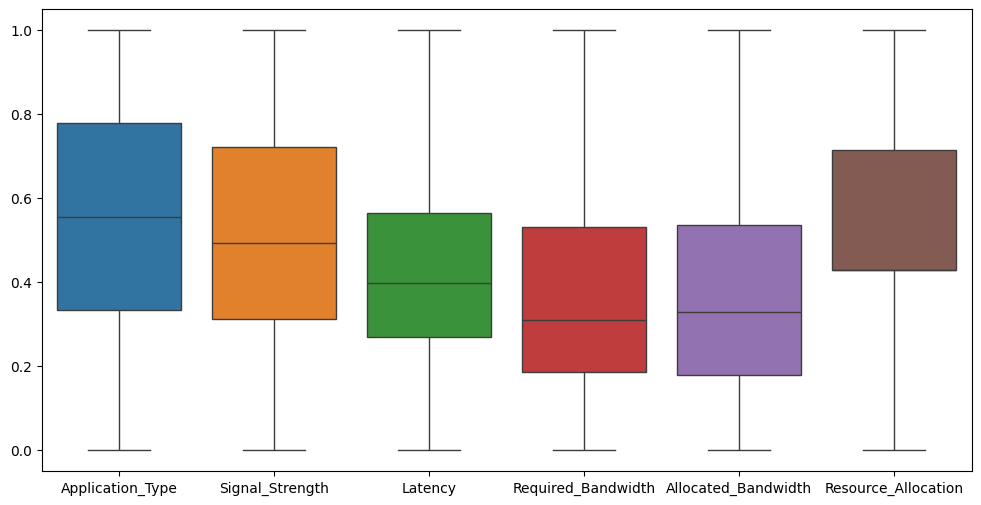

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 399
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Application_Type     387 non-null    float64
 1   Signal_Strength      387 non-null    float64
 2   Latency              387 non-null    float64
 3   Required_Bandwidth   387 non-null    float64
 4   Allocated_Bandwidth  387 non-null    float64
 5   Resource_Allocation  387 non-null    float64
dtypes: float64(6)
memory usage: 21.2 KB


,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.532587,0.520096,0.404227,0.386077,0.390511,0.567368
std,0.337124,0.249585,0.221440,0.273194,0.277136,0.257148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.313253,0.269231,0.185695,0.177892,0.428571
50%,0.555556,0.493976,0.397436,0.310728,0.328017,0.428571
75%,0.777778,0.722892,0.564103,0.531751,0.536625,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:

# **Data Visualization :**

sns.countplot(x=df['Resource_Allocation'])

sns.boxplot(data=df, orient="h", palette="Set2")
sns.boxplot(data=df['Signal_Strength'])

sns.boxplot(data=df['Latency'])

Q1 = np.percentile(df['Latency'], 25, method='midpoint')
Q3 = np.percentile(df['Latency'], 75, method='midpoint')

IQR = Q3-Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

upper_val = np.where(df['Latency'] >= upper)
lower_val = np.where(df['Latency'] <= lower)

df.drop(upper_val[0], inplace=True)
df.drop(lower_val[0], inplace=True)

sns.boxplot(data=df['Latency'])

df.shape

sns.boxplot(data=df['Required_Bandwidth'])

df['Required_Bandwidth'] = np.sqrt(df['Required_Bandwidth'])
sns.boxplot(data=df['Required_Bandwidth'])

df['Allocated_Bandwidth'] = np.sqrt(df['Allocated_Bandwidth'])
sns.boxplot(data=df['Allocated_Bandwidth'])

sns.boxplot(data=df)

def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

Transformed_df = df

Transformed_df['Signal_Strength'] = min_max_scaling(df['Signal_Strength'])
Transformed_df['Latency'] = min_max_scaling(df['Latency'])
Transformed_df['Required_Bandwidth'] = min_max_scaling(df['Required_Bandwidth'])
Transformed_df['Allocated_Bandwidth'] = min_max_scaling(df['Allocated_Bandwidth'])
Transformed_df['Resource_Allocation'] = min_max_scaling(df['Resource_Allocation'])
Transformed_df['Application_Type'] = min_max_scaling(df['Application_Type'])

Transformed_df.drop('Timestamp', axis=1, inplace=True)

plt.figure(figsize=(12,6))
sns.boxplot(data=Transformed_df)
plt.show()


Transformed_df.info()
Transformed_df.describe()


In [6]:

X = Transformed_df.drop('Resource_Allocation', axis=1)
Y = Transformed_df['Resource_Allocation']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape


((309, 5), (78, 5), (309,), (78,))

R² Score: 0.8835
Mean Squared Error: 0.008498
Root Mean Squared Error: 0.092186


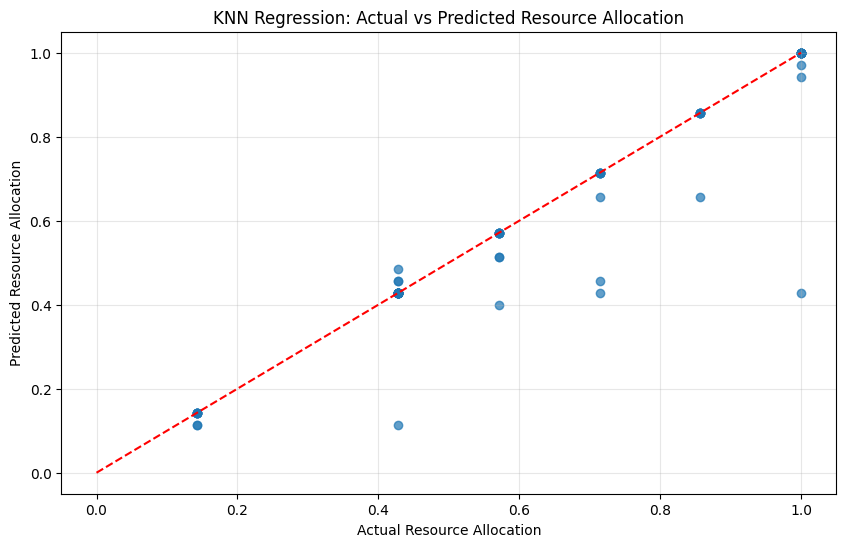

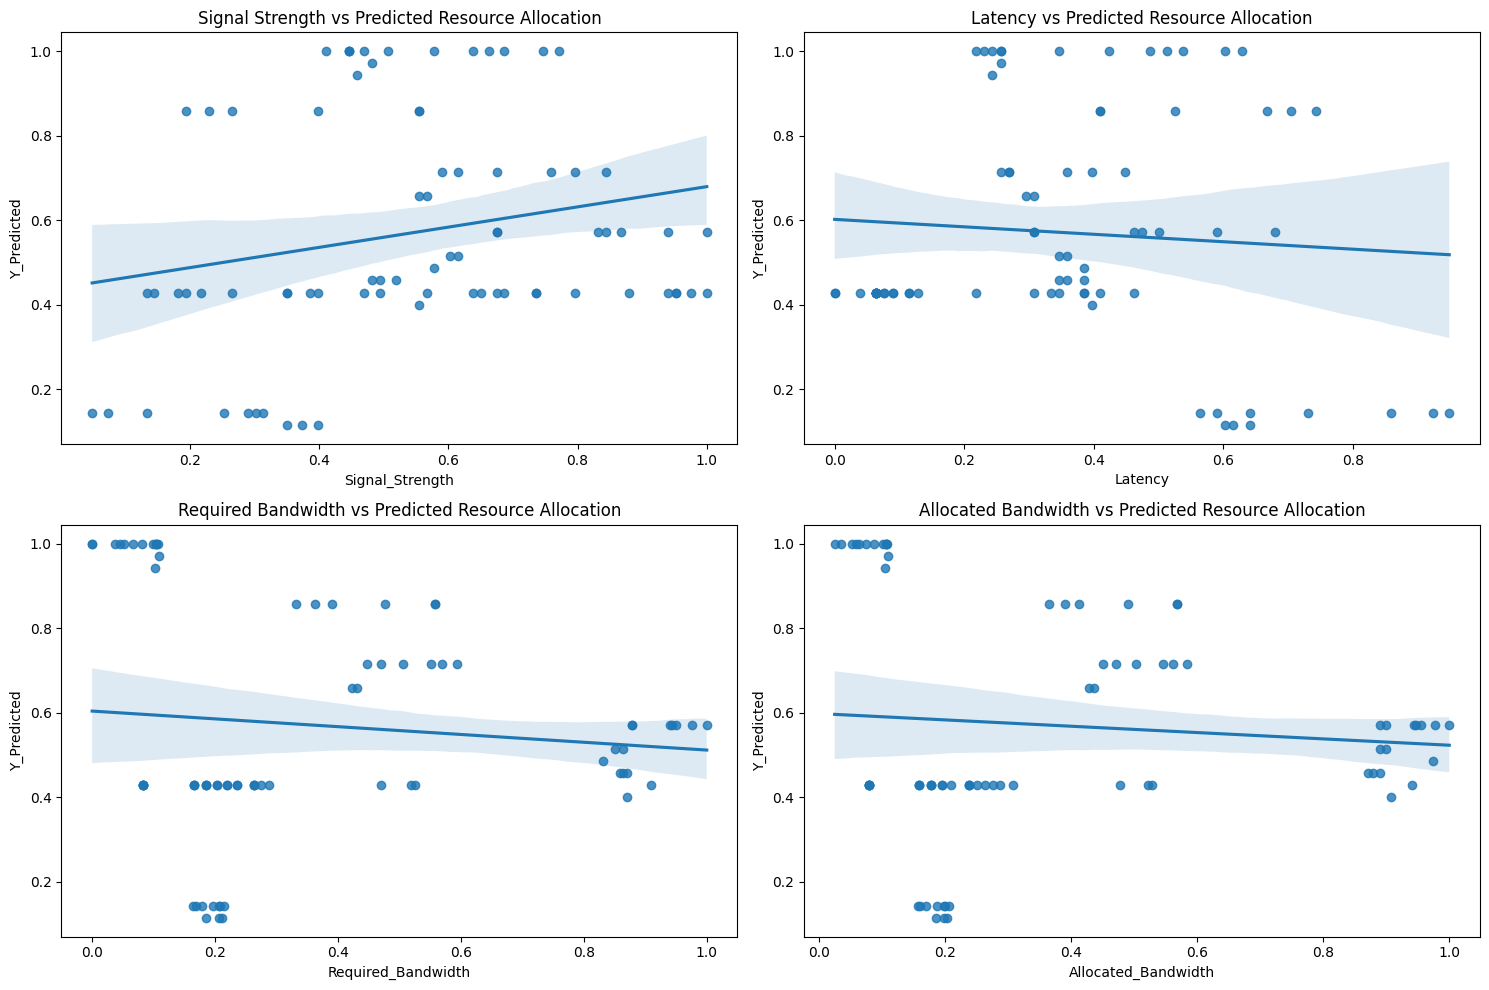

Correlation between features and prediction:
Predicted              1.000000
Signal_Strength        0.213992
Latency               -0.073698
Allocated_Bandwidth   -0.085153
Required_Bandwidth    -0.102185
Application_Type      -0.277208
Name: Predicted, dtype: float64


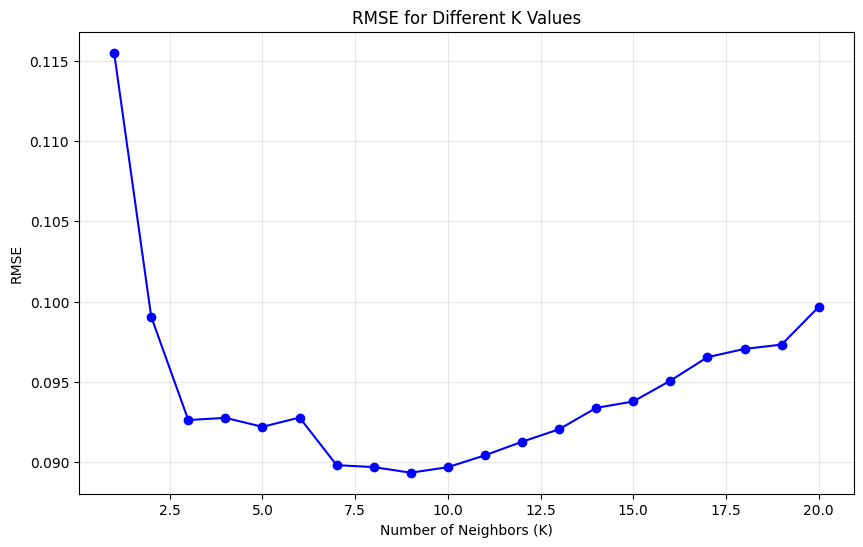

Optimal K value: 9
Optimized KNN Results:
R² Score: 0.8906
RMSE: 0.089322


In [7]:

# **KNN Regression Model**


from sklearn.neighbors import KNeighborsRegressor

knn_regr = KNeighborsRegressor(n_neighbors=5)
knn_regr.fit(x_train, y_train)


knn_y_pred = knn_regr.predict(x_test)


from sklearn.metrics import r2_score, mean_squared_error

knn_r2 = r2_score(y_test, knn_y_pred)
print(f"R² Score: {knn_r2:.4f}")

knn_mse = mean_squared_error(y_test, knn_y_pred)
print(f"Mean Squared Error: {knn_mse:.6f}")

knn_rmse = np.sqrt(knn_mse)
print(f"Root Mean Squared Error: {knn_rmse:.6f}")

# **Visualize the Results of the Prediction :**

plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_y_pred, alpha=0.7)
plt.xlabel('Actual Resource Allocation')
plt.ylabel('Predicted Resource Allocation')
plt.title('KNN Regression: Actual vs Predicted Resource Allocation')
plt.plot([0, 1], [0, 1], 'r--')
plt.grid(True, alpha=0.3)
plt.show()

knn_plot = x_test.copy()
knn_plot['Y_Predicted'] = knn_y_pred

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.regplot(x='Signal_Strength', y='Y_Predicted', data=knn_plot)
plt.title('Signal Strength vs Predicted Resource Allocation')

plt.subplot(2, 2, 2)
sns.regplot(x='Latency', y='Y_Predicted', data=knn_plot)
plt.title('Latency vs Predicted Resource Allocation')

plt.subplot(2, 2, 3)
sns.regplot(x='Required_Bandwidth', y='Y_Predicted', data=knn_plot)
plt.title('Required Bandwidth vs Predicted Resource Allocation')

plt.subplot(2, 2, 4)
sns.regplot(x='Allocated_Bandwidth', y='Y_Predicted', data=knn_plot)
plt.title('Allocated Bandwidth vs Predicted Resource Allocation')

plt.tight_layout()
plt.show()

feature_corr = x_test.copy()
feature_corr['Predicted'] = knn_y_pred
corr_matrix = feature_corr.corr()
print("Correlation between features and prediction:")
print(corr_matrix['Predicted'].sort_values(ascending=False))

k_values = range(1, 21)
rmse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    rmse_scores.append(rmse)

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_scores, 'bo-')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('RMSE')
plt.title('RMSE for Different K Values')
plt.grid(True, alpha=0.3)
plt.show()

optimal_k = k_values[np.argmin(rmse_scores)]
print(f"Optimal K value: {optimal_k}")

optimal_knn = KNeighborsRegressor(n_neighbors=optimal_k)
optimal_knn.fit(x_train, y_train)
optimal_pred = optimal_knn.predict(x_test)
optimal_rmse = np.sqrt(mean_squared_error(y_test, optimal_pred))
optimal_r2 = r2_score(y_test, optimal_pred)

print(f"Optimized KNN Results:")
print(f"R² Score: {optimal_r2:.4f}")
print(f"RMSE: {optimal_rmse:.6f}")